In [1]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("C:\\Users\\a1882\\Desktop\\EEG\\ex_data\\walkl_zyy_EPOCFLEX_2023.03.26T15.01.30+08.00.md.bp.csv", header=1)
print(df)

          Timestamp  EEG.Counter  EEG.Interpolated      EEG.Cz      EEG.Fz   
0      1.679814e+09         84.0               0.0 -105.306389 -198.334839  \
1      1.679814e+09         85.0               0.0  -72.413391 -165.348816   
2      1.679814e+09         86.0               0.0  -42.627132 -138.031158   
3      1.679814e+09         87.0               0.0  -69.736809 -170.168518   
4      1.679814e+09         88.0               0.0 -101.942459 -202.273727   
...             ...          ...               ...         ...         ...   
15282  1.679814e+09         41.0               0.0    7.479897   37.684227   
15283  1.679814e+09         42.0               0.0  -24.802967    5.371157   
15284  1.679814e+09         43.0               0.0  -27.852011   -1.294215   
15285  1.679814e+09         44.0               0.0    4.963534   31.494772   
15286  1.679814e+09         45.0               0.0   -1.701429   34.537125   

          EEG.Fp1      EEG.F7      EEG.F3     EEG.FC1      EEG.

In [16]:
ch_info = df.iloc[:, [0] + list(range(3, 35))]
ch_info

,Timestamp,EEG.Cz,EEG.Fz,EEG.Fp1,EEG.F7,EEG.F3,EEG.FC1,EEG.C3,EEG.FC5,EEG.FT9,...,EEG.CP2,EEG.CP6,EEG.T8,EEG.FT10,EEG.FC6,EEG.C4,EEG.FC2,EEG.F4,EEG.F8,EEG.Fp2
0,1.679814e+09,-105.306389,-198.334839,-336.876251,-129.067551,-10.170383,62.382740,21.142912,-57.114506,-554.611633,...,-250.638107,-331.815338,-401.114746,-612.492065,-484.698883,867.942810,-102.092735,-224.480072,-518.777344,-351.819702
1,1.679814e+09,-72.413391,-165.348816,-303.751678,-96.150795,22.627480,77.177284,53.909462,-35.028160,-521.269348,...,-217.599777,-312.528137,-367.925934,-579.091858,-451.426483,894.739502,-99.429108,-191.467896,-485.470856,-318.680206
2,1.679814e+09,-42.627132,-138.031158,-274.246399,-68.902336,37.461777,82.735489,86.643242,-26.796209,-487.960388,...,-201.500626,-315.801758,-353.725708,-557.508179,-435.093536,899.480103,-87.546600,-164.636429,-453.222321,-288.647675
3,1.679814e+09,-69.736809,-170.168518,-306.247528,-97.522667,11.808928,66.771217,61.453522,-40.601723,-515.649353,...,-232.549896,-340.589020,-385.647369,-584.615234,-466.933807,893.969849,-87.971359,-196.747177,-485.044495,-320.634399
4,1.679814e+09,-101.942459,-202.273727,-338.216675,-129.700531,-11.256726,47.236752,29.116686,-55.418041,-547.409058,...,-254.858887,-344.859192,-399.606323,-616.306030,-492.082275,901.272827,-107.863388,-228.825821,-516.834839,-352.589172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15282,1.679814e+09,7.479897,37.684227,-7.970643,-34.873764,-149.839371,-520.486511,110.792870,-353.325531,89.555939,...,42.059093,-71.694267,37.481602,142.904861,40.934612,302.461548,-135.899948,-46.653374,54.845375,20.603090
15283,1.679814e+09,-24.802967,5.371157,-40.238056,-67.114273,-177.866455,-518.429077,78.406693,-366.292206,57.190998,...,9.741650,-83.405655,5.168734,110.486565,8.618292,306.257568,-157.793274,-78.882103,22.515144,-11.692897
15284,1.679814e+09,-27.852011,-1.294215,-39.685509,-63.973316,-175.639359,-515.349121,78.840591,-367.975159,66.867653,...,9.731908,-85.883789,-10.717974,106.789925,-1.636481,296.217468,-165.320099,-78.290916,19.418783,-8.607358
15285,1.679814e+09,4.963534,31.494772,-6.858133,-31.121651,-146.262177,-521.493774,111.549446,-368.631805,99.588478,...,34.825253,-79.650208,22.080437,139.470825,30.640541,276.965851,-137.490158,-45.424931,52.187057,24.188942


In [17]:
data_c = ch_info.iloc[:,1:]
data_c

,EEG.Cz,EEG.Fz,EEG.Fp1,EEG.F7,EEG.F3,EEG.FC1,EEG.C3,EEG.FC5,EEG.FT9,EEG.T7,...,EEG.CP2,EEG.CP6,EEG.T8,EEG.FT10,EEG.FC6,EEG.C4,EEG.FC2,EEG.F4,EEG.F8,EEG.Fp2
0,-105.306389,-198.334839,-336.876251,-129.067551,-10.170383,62.382740,21.142912,-57.114506,-554.611633,-289.046356,...,-250.638107,-331.815338,-401.114746,-612.492065,-484.698883,867.942810,-102.092735,-224.480072,-518.777344,-351.819702
1,-72.413391,-165.348816,-303.751678,-96.150795,22.627480,77.177284,53.909462,-35.028160,-521.269348,-300.540405,...,-217.599777,-312.528137,-367.925934,-579.091858,-451.426483,894.739502,-99.429108,-191.467896,-485.470856,-318.680206
2,-42.627132,-138.031158,-274.246399,-68.902336,37.461777,82.735489,86.643242,-26.796209,-487.960388,-284.358307,...,-201.500626,-315.801758,-353.725708,-557.508179,-435.093536,899.480103,-87.546600,-164.636429,-453.222321,-288.647675
3,-69.736809,-170.168518,-306.247528,-97.522667,11.808928,66.771217,61.453522,-40.601723,-515.649353,-301.492432,...,-232.549896,-340.589020,-385.647369,-584.615234,-466.933807,893.969849,-87.971359,-196.747177,-485.044495,-320.634399
4,-101.942459,-202.273727,-338.216675,-129.700531,-11.256726,47.236752,29.116686,-55.418041,-547.409058,-333.466309,...,-254.858887,-344.859192,-399.606323,-616.306030,-492.082275,901.272827,-107.863388,-228.825821,-516.834839,-352.589172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15282,7.479897,37.684227,-7.970643,-34.873764,-149.839371,-520.486511,110.792870,-353.325531,89.555939,-80.376350,...,42.059093,-71.694267,37.481602,142.904861,40.934612,302.461548,-135.899948,-46.653374,54.845375,20.603090
15283,-24.802967,5.371157,-40.238056,-67.114273,-177.866455,-518.429077,78.406693,-366.292206,57.190998,-112.571358,...,9.741650,-83.405655,5.168734,110.486565,8.618292,306.257568,-157.793274,-78.882103,22.515144,-11.692897
15284,-27.852011,-1.294215,-39.685509,-63.973316,-175.639359,-515.349121,78.840591,-367.975159,66.867653,-116.557251,...,9.731908,-85.883789,-10.717974,106.789925,-1.636481,296.217468,-165.320099,-78.290916,19.418783,-8.607358
15285,4.963534,31.494772,-6.858133,-31.121651,-146.262177,-521.493774,111.549446,-368.631805,99.588478,-83.653000,...,34.825253,-79.650208,22.080437,139.470825,30.640541,276.965851,-137.490158,-45.424931,52.187057,24.188942


In [18]:
df.index

RangeIndex(start=0, stop=15287, step=1)

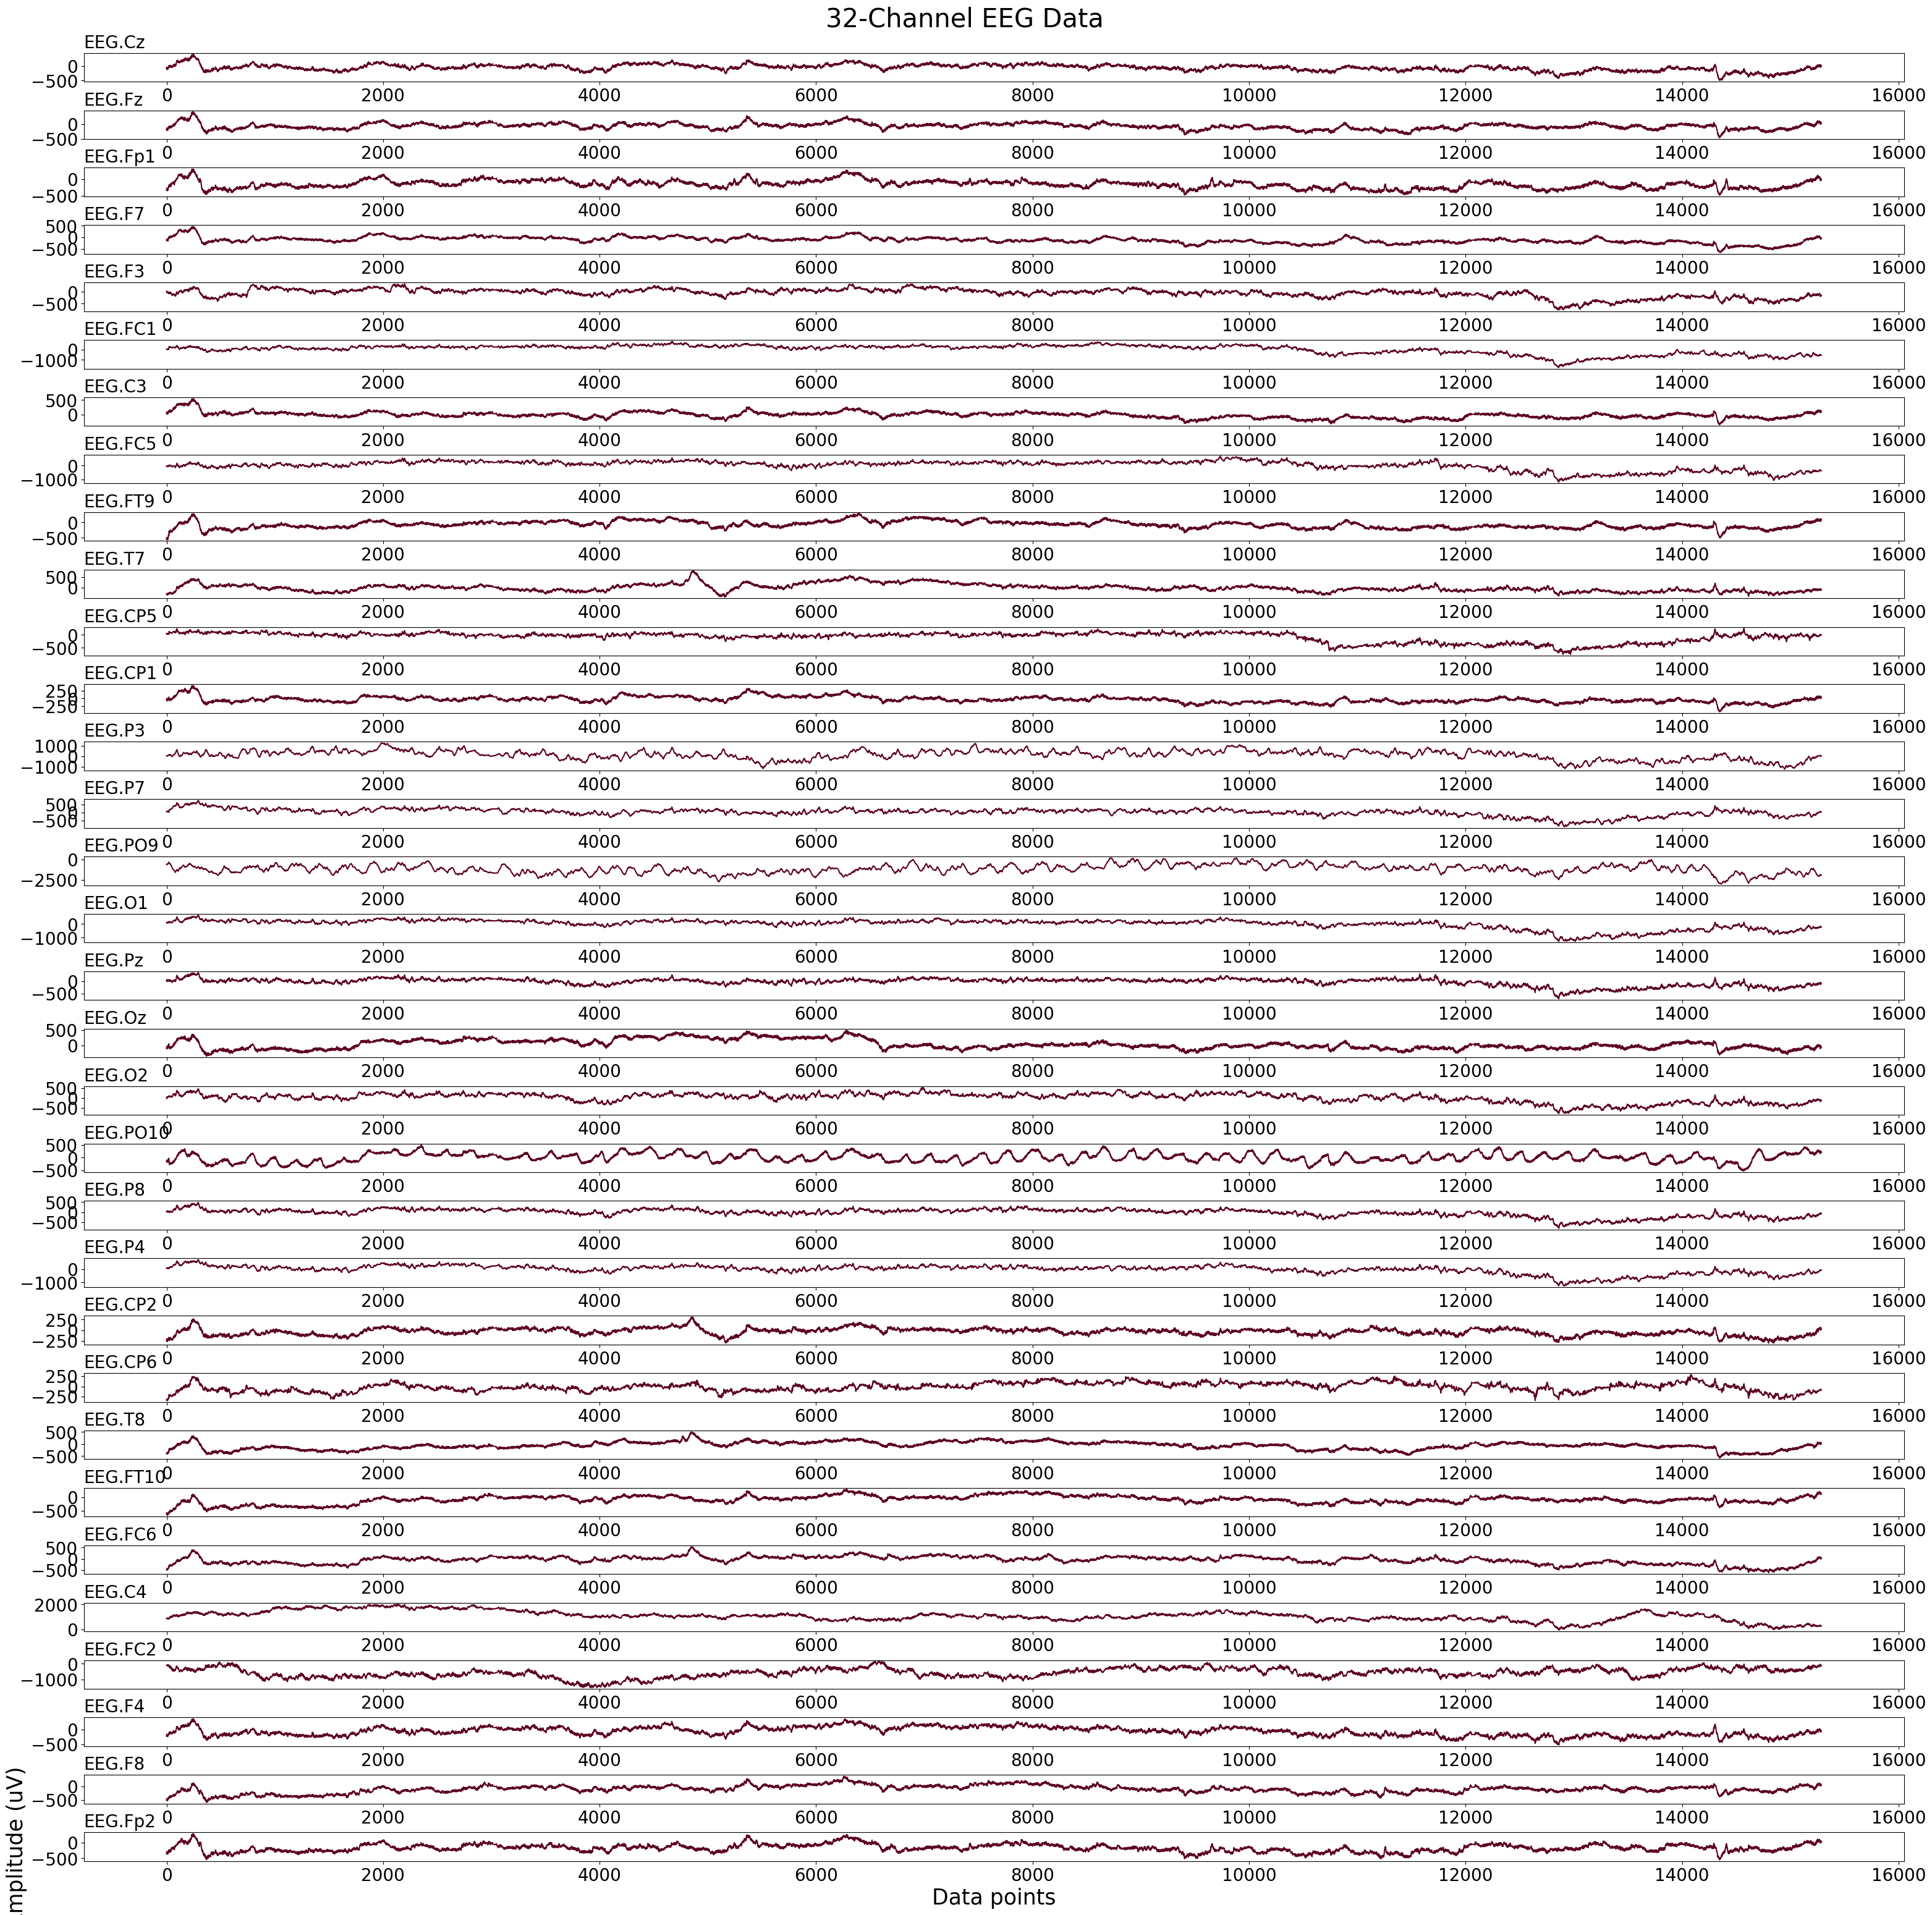

In [19]:
df = data_c.T 
# 创建32个子图
fig, axs = plt.subplots(32, figsize=(38, 38))
fig.patch.set_alpha(0.)
hex_green = '#5c0022'
# 绘制每个子图
for i in range(32):
    axs[i].plot(df.iloc[i,:],hex_green)
    axs[i].set_facecolor('none')
    axs[i].set_title(f'{df.index[i]}', loc='left',fontsize=20)


# 添加标题和轴标签
title = fig.suptitle('32-Channel EEG Data')
# title = fig.set_title('Title')
title.set_position([.5, 0.90])
# suptitle.set_position([.5, 1.05])
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('font', size=25)

# 调整子图之间的间距和边距
plt.subplots_adjust(hspace=1)
# plt.savefig("channel_eeg.png", dpi=330, bbox_inches='tight')
plt.savefig("channel_eeg.png", dpi=230)
plt.show()
